# **STATISTICAL ANALYSIS**

### **First Dataset**

In [61]:
#First, let's load the "tips" dataset from seaborn.
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm




In [32]:
# Load the tips dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
#Data Cleaning

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df_cleaned = df.dropna()



total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [34]:
# Check for duplicates
print(df_cleaned.duplicated().sum())



1


In [35]:
# Remove duplicates (if any)
df_cleaned = df_cleaned.drop_duplicates()


### **Descriptive Statistics**

In [36]:
# Summary statistics
df_cleaned.describe()









,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


In [37]:
# Selecting only numeric columns for statistical calculations
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Mean of each numeric column
print(numeric_cols.mean())



total_bill    19.813868
tip            3.002387
size           2.572016
dtype: float64


In [38]:
# Median of each numeric column
print(numeric_cols.median())



total_bill    17.81
tip            2.92
size           2.00
dtype: float64


In [39]:
# Mode of each column (note: mode can handle categorical data)
print(df_cleaned.mode())



   total_bill  tip   sex smoker  day    time  size
0       13.42  2.0  Male     No  Sat  Dinner     2


In [40]:
# Standard deviation of each numeric column
print(numeric_cols.std())


total_bill    8.910071
tip           1.385002
size          0.952356
dtype: float64


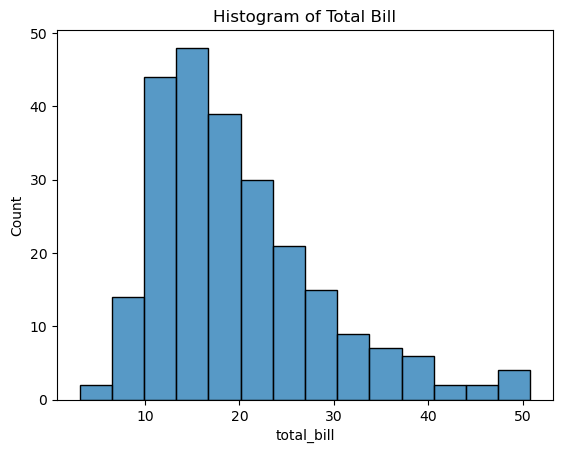

In [41]:
# Histogram of total bill
sns.histplot(df_cleaned['total_bill'])
plt.title('Histogram of Total Bill')
plt.show()



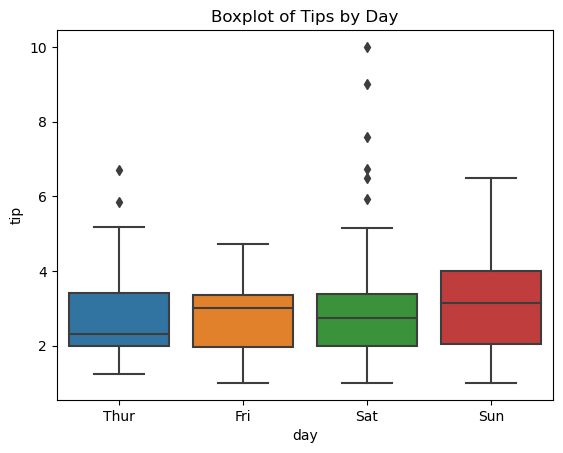

In [42]:
# Boxplot of tips by day
sns.boxplot(x='day', y='tip', data=df_cleaned)
plt.title('Boxplot of Tips by Day')
plt.show()

### **Inferential Statistics**

In [43]:
#Hypothesis Testing

#We can test if there's a significant difference in tip amounts between smokers and non-smokers using a t-test.

# Tips for smokers and non-smokers
smokers = df_cleaned[df_cleaned['smoker'] == 'Yes']['tip']
non_smokers = df_cleaned[df_cleaned['smoker'] == 'No']['tip']

# Perform a t-test
t_stat, p_val = stats.ttest_ind(smokers, non_smokers)
print('T-statistic:', t_stat)
print('P-value:', p_val)




T-statistic: 0.15156585951381893
P-value: 0.8796561596489987


In [44]:
if (p_val < 0.05):
    print('reject the hypothesis')
else:
    print('do not reject the hypothesis')

do not reject the hypothesis


In [45]:
#Regression Analysis
#We model the relationship between the total bill and the tip amount using linear regression.

import statsmodels.api as sm

# Simple linear regression
X = df_cleaned['total_bill']
y = df_cleaned['tip']
X = sm.add_constant(X)  # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X)




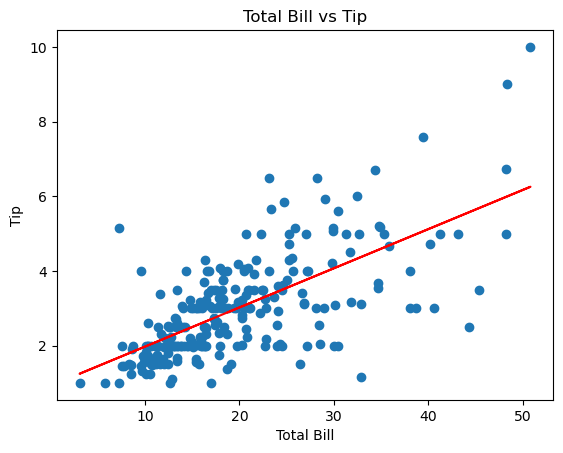

In [46]:
# Plotting the regression line
plt.scatter(df_cleaned['total_bill'], df_cleaned['tip'])
plt.plot(df_cleaned['total_bill'], predictions, color='red')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')
plt.show()

### **Second Dataset**

In [47]:

#Let's load the "diamonds" dataset from Seaborn.

# Load the diamonds dataset
df = sns.load_dataset('diamonds')
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [48]:
#Data Cleaning

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df_cleaned = df.dropna()



carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [49]:
# Check for duplicates
print(df_cleaned.duplicated().sum())



146


In [50]:
# Remove duplicates (if any)
df_cleaned = df_cleaned.drop_duplicates()


### **Descriptive Statistics**

In [51]:
# Summary statistics
df_cleaned.describe(include='all')




,carat,cut,color,clarity,depth,table,price,x,y,z
count,53794.00000,53794,53794,53794,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21488,11262,13032,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.79778,NaN,NaN,NaN,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,NaN,NaN,NaN,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,NaN,NaN,NaN,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,NaN,NaN,NaN,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000


In [52]:
# Selecting only numeric columns for statistical calculations
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Mean of each numeric column
print(numeric_cols.mean())




carat       0.797780
depth      61.748080
table      57.458109
price    3933.065082
x           5.731214
y           5.734653
z           3.538714
dtype: float64


In [53]:
# Median of each numeric column
print(numeric_cols.median())



carat       0.70
depth      61.80
table      57.00
price    2401.00
x           5.70
y           5.71
z           3.53
dtype: float64


In [54]:
# Mode of each column (note: mode can handle categorical data)
print(df_cleaned.mode().iloc[0])  # Mode for each column may contain multiple values



carat        0.3
cut        Ideal
color          G
clarity      SI1
depth       62.0
table       56.0
price        605
x           4.37
y           4.34
z            2.7
Name: 0, dtype: object


In [55]:
# Standard deviation of each numeric column
print(numeric_cols.std())

carat       0.473390
depth       1.429909
table       2.233679
price    3988.114460
x           1.120695
y           1.141209
z           0.705037
dtype: float64


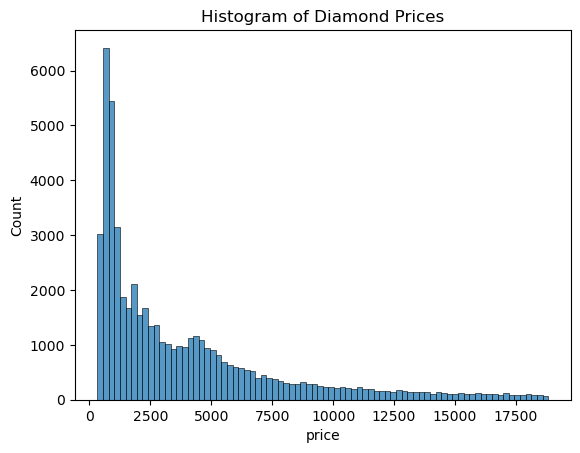

In [56]:
# Visualizations

# Histogram of diamond prices
sns.histplot(df_cleaned['price'])
plt.title('Histogram of Diamond Prices')
plt.show()




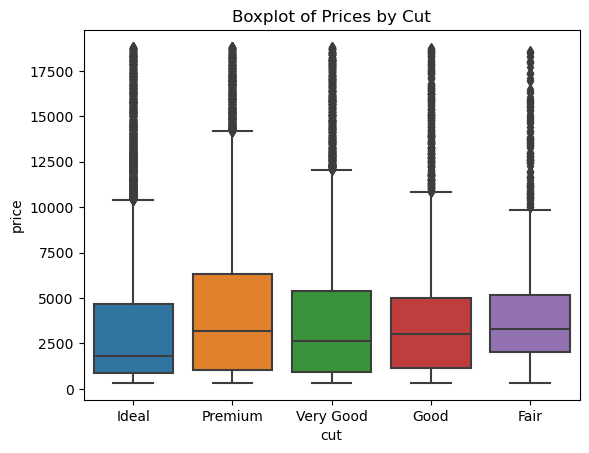

In [57]:
# Boxplot of prices by cut
sns.boxplot(x='cut', y='price', data=df_cleaned)
plt.title('Boxplot of Prices by Cut')
plt.show()

### **Inferential Statistics**

In [58]:
#Hypothesis Testing
#Test if there's a significant difference in diamond prices between different cuts using a t-test.


# Prices for different cuts
ideal = df_cleaned[df_cleaned['cut'] == 'Ideal']['price']
premium = df_cleaned[df_cleaned['cut'] == 'Premium']['price']

# Perform a t-test on ideal and premium
#Continue the code in the same manner as it was executed on the initial dataset.


In [59]:
#Regression Analysis
#Model the relationship between carat weight and diamond price using linear regression.

import statsmodels.api as sm

# Simple linear regression
X = df_cleaned['carat']
y = df_cleaned['price']
X = sm.add_constant(X)  # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X)



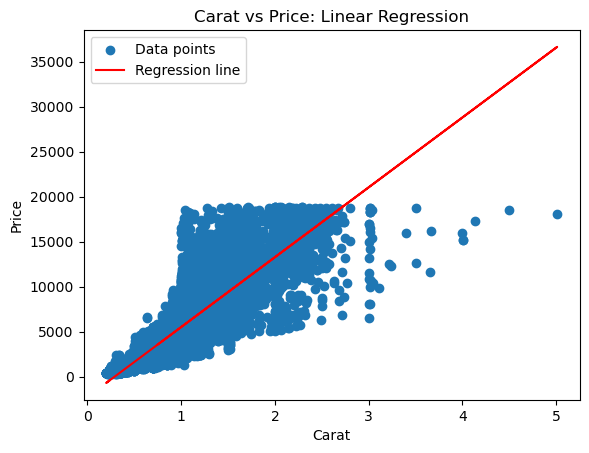

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.030e+05
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:30:45   Log-Likelihood:            -4.7145e+05
No. Observations:               53794   AIC:                         9.429e+05
Df Residuals:                   53792   BIC:                         9.429e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2260.6268     13.083   -172.793      0.0

In [62]:

# Plotting
plt.scatter(df_cleaned['carat'], df_cleaned['price'], label='Data points')
plt.plot(df_cleaned['carat'], predictions, color='red', label='Regression line')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Carat vs Price: Linear Regression')
plt.legend()
plt.show()

# Print the model summary
print(model.summary())
